<center>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/adsp_logo.png?raw=1">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Filters

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/5nw86XtKvyc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Filters are linear, time-invariant systems. This means they fulfil the following properties:

If $F(x(n))$ is our filter function of input signal $x(n)$, then we have:

**Linearity:** for 2 signals $x_1(n)$ and $x_2(n)$,

$$\large
F( x_1(n)+x_2(n) )=F( x_1(n) )+F( x_2(n) )$$

With a factor $a$:

$$\large F( a \cdot x(n) )= a \cdot F( x(n) )$$

which means we can **“draw out” sums and factors out of our function.**

**Time-Invariance:** if

$$\large y(n)=F(x(n))$$

then we have, for a delay of $n_0$:

$$\large
y(n+n_0)=F(x(n+n_0))
$$

which means our function **stays the same no matter when** we apply it.


## FIR Filters

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BO_Baz1EbXc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A simple Finite Impulse Response (**FIR**) filter has a difference equation like the following, with x(n) the input of our filter, and y(n) its output:

$$\large
y(n)=\sum _ {m=0}^ L b(m) x(n-m)
$$

Observe that this is the **convolution** of the signal x(n) with b(n). Here, the b(m) are the coefficients of the filter, or its **impulse response**. These are commonly also referred to as **“taps”**, because this system can be viewed as “tapping” a delay line, as seen in the picture below.

This difference equation is also how usually filters are implemented in Matlab or Python and other programming languages. A typical block diagram of an FIR filter is as follows:

<center>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/fir_filter_diag.PNG?raw=1" width="500">
</center>
<font size="2">      
(From: http://en.wikipedia.org/wiki/Finite_impulse_response)
</font>

Observe that here the blocks with $z^{-1}$ are implemented with a delay by 1 sampling interval, not a multiplication with $z^{-1}$, as we would in the z-domain!

After the first delay block $z^{-1}$ we have $x[n-1]$, after the second delay block we have $x[n-2]$, and so on. Each delay block “memorizes” the value from the left for one sample clock cycle, and releases it to the right at the next sample clock cycle.
Hence they delay samples by 1 sample clock cycle.

The z-transform of our difference equation of our convolution

$$\large
y(n)=\sum _ {m=0} ^L b(m) x(n-m)
$$

 is (using the linearty of the z-Transform):

$$\large
Y(z)= \sum _{m=0} ^ L b(m) \cdot z^{-m} \cdot X(z)= X(z) \cdot \sum _ {m=0} ^ L b(m) \cdot z^{-m}
$$

Now we can compute the **transfer function**, defined as the output divided by the input,

$$\large
H(z):= \frac{Y(z)} {X(z)}=\sum _ {m=0} ^ L b(m) \cdot z^{-m}
$$

**Observe**  that this is the z-transform of the coefficients b(m)! This is the **z-transform of the impulse response** of the FIR filter!

Now we can obtain the **frequency response** (so that we can see which frequencies are attenuated and which are not) from our transfer function of the filter by just replacing $z$ by $e^{j \Omega}$:

$$\large
H(e^{j\Omega})=\sum _{m=0} ^L b(m) \cdot e^{-j\Omega \cdot m}
$$

Since $e^{j\Omega}$ is a complex number, our frequency response $H$ is also complex. Hence is a complex number for each frequency $\Omega$. Usually it is plotted as a **magnitude** plot and a **phase** plot over frequency. Its magnitude tells us the attenuation at each frequency, and the phase its phase shift for each frequency. Using those 2 plots or properties, we can also design our filters with desired properties (for instance a stop-band at given frequencies). The Matlab and Python  function to generate a magnitude and phase plot of a transfer function or signal is “freqz”, which we already saw.

**Recommended**: https://github.com/GuitarsAI/MRSP_Notebooks - 03 Frequency Response

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7XWrH9IV-EA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## IIR Filters

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/82aPiJ4gegM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Their difference equation is:

$$\large
\begin{equation}
y(n)= \sum _{m=0} ^L b(m) \cdot x(n-m)+ \sum _ {r=1} ^R a(r) \cdot y(n-r)
\end{equation}$$    

(See also: Oppenheim, Schafer: “Discrete Time Signal Processing”, Chapter 6 in Ed. 1989)

Here we have **2 convolutions**. Observe the feedback from the output y back to the input in this sum. Also observe that the feedback part starts with a delay of r=1. This is because we want to avoid so-called delayless loops. We cannot use the value y(n) before we computed it! Again, this difference equation is the usual implementation using Matlab or Octave or Python.

The following image shows the corresponding block diagram of our filter,

<center>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/Lecture7-2.PNG?raw=1" width="500">
</center>


Again, here the boxes with $z^{-1}$ symbolize a delay of 1 sampling period, and the triangles symbolize a multiplication with the factor written next to it.


We can simplify this structure by combining the summations,<br><br>

<center>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/Lecture7-3.PNG?raw=1" width="500">
</center>

The z-transform of its difference equation (1) is

$$ \large
Y(z)= \sum _{m=0} ^ L b(m) \cdot X(z) \cdot z^{-m} + \sum _{r=1} a(r) \cdot Y(z) \cdot z^{-r}$$

**Observe:** **Matlab and Octave** and **Python scipy.signal.lfilter** are defining the coefficients a with **opposite signs** as we and Oppenheim/Schafer are defining. See for instance “help filter” or “help(scipy.signal.lfilter)” in Python.

To obtain its transfer function, we first move the Y(z) to one side:

$$\large
Y(z)(1-\sum _ {r=1} ^R a(r) \cdot z^{-r})= X(z) \cdot \sum _{m=0} ^ L b(m) \cdot  z^{-m}
$$

Hence the resulting transfer function is

$$ \large
H(z)=\frac{Y(z)}  {X(z)}= \frac{\sum _ {m=0} ^L b(m)  \cdot z^{-m}}{1-\sum _ {r=1} ^ R a(r) \cdot z^{-r}}
$$


**Observe:** With the help of the z-Transform we were able to find a closed form solution for the transfer function, even though we have a feedback loop in our system! This is a **big advantage** for the z-Transform.

Here we can see that we obtain a polynomial in the **denominator** of our transfer function, and hence poles. And the filter can potentially become unstable! The zeros of this denominator polynomial become the poles of the transfer function. If these poles are all **inside the unit circle**, we have a **stable filter**! This also shows that we just need to design our coefficients a(n) such that the **poles are inside the unit circle for stabiltity**.


## Combined FIR-IIR Structure used in the Python “lfilter” Function:

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BwFKOX1_uOQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Since a delay is a linear operator, we can shift it after a summation, and hence can combine the delay chain for the FIR and IIR part. This reduces the memory requirement for an implementation, and leads to the following structure,

<center>
    <br>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/diagram.png?raw=1" width="400">
</center>

## Filter Example

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/KEByT7Y93Jw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Going back to our simple example of an exponential decaying signal, this shows how to implement it. We just need a system with a pole at position p. In the above equation we obtain it by setting b(0)=1 and a(1)=p. Hence we obtain a simple difference equation

$$\large
y(n)=1\cdot x(n)+p \cdot y(n-1)$$

Here you can see: if x(n) is the unit pulse, the output is the exponential decaying sequence:

$$\large
1,p,p^{2},p^{3},...
$$

which is an infinitely long impulse response. Hence the name IIR.

This can also be written in the form of a block diagram:

<center>
    <br>
    <img src="https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/images/diagram2.png?raw=1" width="400">
</center>

(also compare it with the Python implementaion block diagram above, for $b[0]=1$ and $a[1]=p$).<br>
In the z-domain this is

$$\large
Y(z)=X(z)+p \cdot z^{-1} \cdot Y(z)$$


$$\large
\rightarrow H(z)=\frac{Y(z)}{X(z)}= \frac{1}  {1-p \cdot z^{-1}}
$$

In this structure we can now see the feedback loop. Observe that this is the same as the z-Transform of our exponential series before. This means, when we transform this back to the time domain, we obtain an exponential function, which is the **filters impulse response**, which confirms what we just saw by using an impulse in the time domain for our filter. So the result of the inverse z-Transform of our transfer function is indeed,

$$\large
1,p,p^{2},p^{3},...
$$.

### Computing the Resulting Frequency Response

**Example:** The Matlab or Octave or Python function “freqz” (we have a Python freqz function also in Moodle) can be used to plot the magnitude and phase plot of the transfer function of this filter. Its input are directly the coefficients a and b of the transfer function H(z), in the form:  ```freqz(B,A)```, where B and A are vectors containing the coefficients.

If we choose a(1)=p=0.9 in our example, we obtain $A=[1,-0.9]$ and $B=[1].$

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/43xAxBni44w" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [4]:
%matplotlib inline
from scipy.signal import freqz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [5]:
A=np.array([1,-0.9])
B=np.array([1])
w, h = freqz(B, A, worN=512, whole=False)

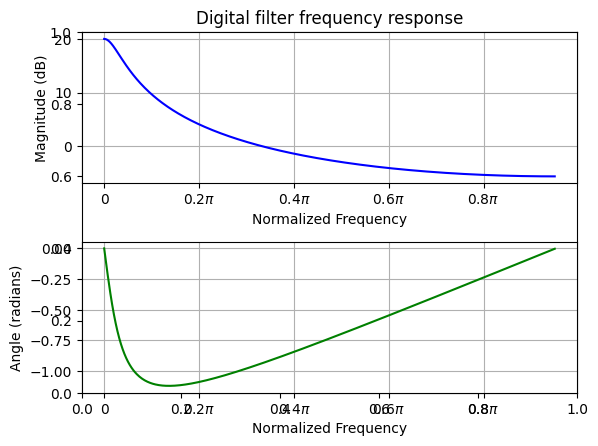

In [17]:
fig = plt.figure()
plt.title('Digital filter frequency response')
plt.subplot(2,1,1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.66))
plt.subplot(2,1,2)
angles = np.angle(h)
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.66))
plt.grid()
plt.tight_layout()


Observe that the horizontal axis is the normalized frequency (see last lecture), its right hand side is $\pi$, which is the Nyquist frequency or half the sampling frequency.

The frequency response we see here has a low pass characteristic.

We can use the command “zplane” (also in Moodle) to plot the location of the zeros and poles in the complex z-plane.
For that we first need to calculate the pole an zero positions with Pythons function np.roots.

We have
$$\large
H(z) = \dfrac{1}{1-p \cdot z^{-1}} $$

and roots expects as argument the ordered coefficients of our polinomial in $z^-1$ (which makes it compatible with *lfilter*). Hence our pole positions are the `np.roots(a)` and the zeros at `np.roots(b)`.

In [18]:
def zplane(B,A):
    # Plot Poles and Zeros
    from  matplotlib import patches
    plt.figure(figsize=(6,4))
    ax = plt.subplot(111)
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    #ticks = [-1, 1]; plt.xticks(ticks); plt.yticks(ticks)
    # Unit Circle
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('Re', horizontalalignment='right', x=1.0)
    plt.ylabel('Im',  y=1.0)
    plt.title('Complex z-Plane', loc='right')
    plt.grid()
    plt.plot(np.real(A),np.imag(A),'rx')
    plt.plot(np.real(B),np.imag(B),'bo')

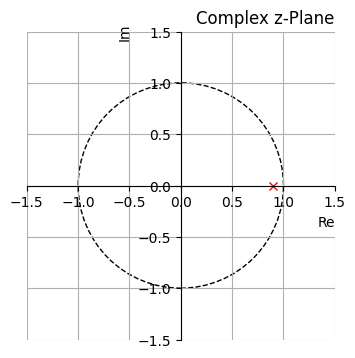

In [19]:
zplane(np.roots(B),np.roots(A))

**Zeros** are marked with an **“o”**, and **poles** are marked with an **“x”**. Here we see the pole at location z=0.9.

In general, the **closer a pole** is to the **unit circle**, the larger is the corresponding **peak** in the **magnitude** of the frequency response at a **normalized** frequency identical to the **angle of the pole** to the origin.

This can be seen by turning the z-transform into a DTFT by replacing z by $e^{j\Omega}$. Hence the frequency response is obtained by “running” on this unit circle, $\Omega$ is our angle and also normalized frequency, and the closer we get to a pole, the higher the magnitude of the frequency response becomes. This is opposite for zeros, the closer we come to a zero, the smaller magnitude of the frequency response becomes.

Here our pole has an angle of 0 degrees. In the example we can indeed observe a peak in the magnitude response at normalized frequency $\Omega=0$ above.

The **filtering** operation itself works similarly in Matlab or Octave or Python, in the time domain. The function is “filter” or “lfilter”. Given an input signal in the vector x, and filter coefficients in vectors A and B, the filtered output y of our filter is simply:

```y=lfilter(B,A,x);```

Often used orders for the zeros and poles L and R are a few to a few dozen coefficients.

**Python example:**

Use the function *`lfilter`* to obtain the impulse response of this IIR filter.
        

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/T4tpZkugC7U" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

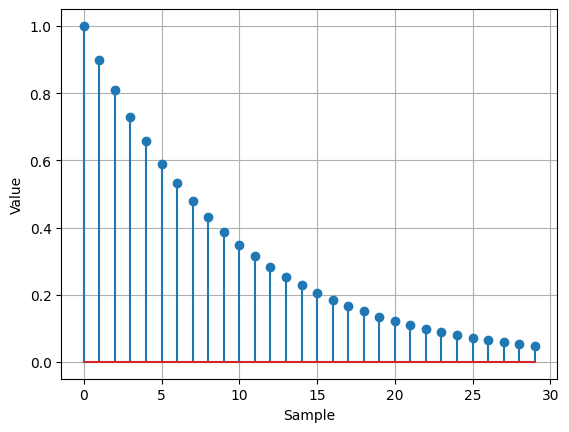

In [21]:
import scipy.signal
import matplotlib.pyplot as plt
#Start with a unit pulse as input x:
x=np.zeros(30)
x[0] = 1
#B and A are given as before:
A=[1,-0.9];
B=[1];
#Now calculate the impulse response:
y=scipy.signal.lfilter(B,A,x);
plt.figure()
plt.stem(y)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()


Here we can see the indeed exponetial decaying function (the sequence $ir(n)=p^{n}$ for p=0.9). In this way we can also test more complicated IIR filters.

This exponential decaying impulse response again shows the stability of the filter, which was to be expected because the pole of its transfer function in the z-domain is placed at z=0.9, and hence inside the unit-circle!